<a href="https://colab.research.google.com/github/ismailerbas/Projects-in-Machine-Learning-and-AI/blob/main/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Problem


Cervical cancer is one of the most common cancers in women. Women are at risk throughout their lives. Human papillomavirus (HPV), a very common infection of the cervix, is responsible for almost all dysplasia and cancers of the cervix. Early detection is very important. According to Sobar et al. [1] cervical cancer risk can be determined based on behavior of the patients. Here I used logistic regression on cervical cancer dataset for early detection of the cancer by using behaviors of the patients. I used logistic regression because the data is linearly seperable and iy is a binary classification.

Setting up Libraries

In [306]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
warnings.filterwarnings("ignore")

The data


In [3]:
# The dataset is taken from: https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk
df = pd.read_csv('/content/drive/My Drive/mlp/sobar.csv')

Exploratory Data Analysis (EDA)

In [3]:
# Here we can see a part of the data 
df.head()


,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [5]:
# The data shape is
df.shape
# We can see that the data has 19 attributes and 72 patients 

(72, 20)

In [6]:
# Next we check if there are NaN values in the data
df.isna().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

In [7]:
# We can see that there are no NaN values, we can get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [8]:
# Since we just have numerical colums we can get the statistics about the dataset
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [ ]:
# From these results we can see that commitment intention's mean is highest amoung the others with standart deviation of 2.37
# whereas significantperson norm column has the least mean with standart deviation of 1.85 
# we can see that fulfillment norm has highest standart deviation of 4.91

Text(0.5, 1.0, 'intention_commitment')

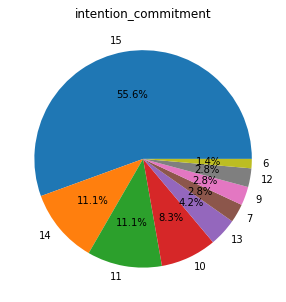

In [4]:
# As we can see in pie chart that patients got majority of 15 and none of 1,2,3,4,5,8  intention commitment
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.intention_commitment.value_counts(), 
       labels=df.intention_commitment.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('intention_commitment')

Text(0.5, 1.0, 'norm_significantPerson')

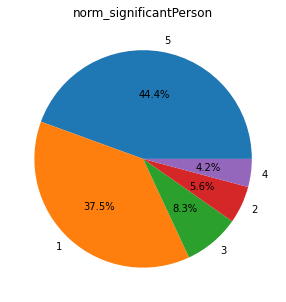

In [16]:
# As we can see in pie chart that patients got majority of 5 and none of 6,7,8,9,10,11,12,13,14,15 on norm_significantPerson
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.norm_significantPerson.value_counts(), 
       labels=df.norm_significantPerson.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('norm_significantPerson')

In [10]:
# We can check if the data is balanced or not 
df.ca_cervix.value_counts(normalize=True) #normalizes the result


0    0.708333
1    0.291667
Name: ca_cervix, dtype: float64

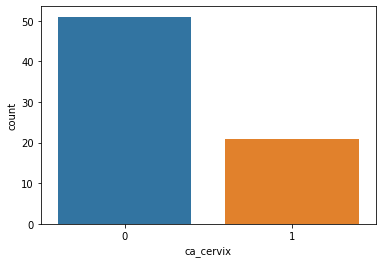

In [15]:
# We can visualize the inbalanced data by plotting it
ax=sns.countplot(df['ca_cervix'])

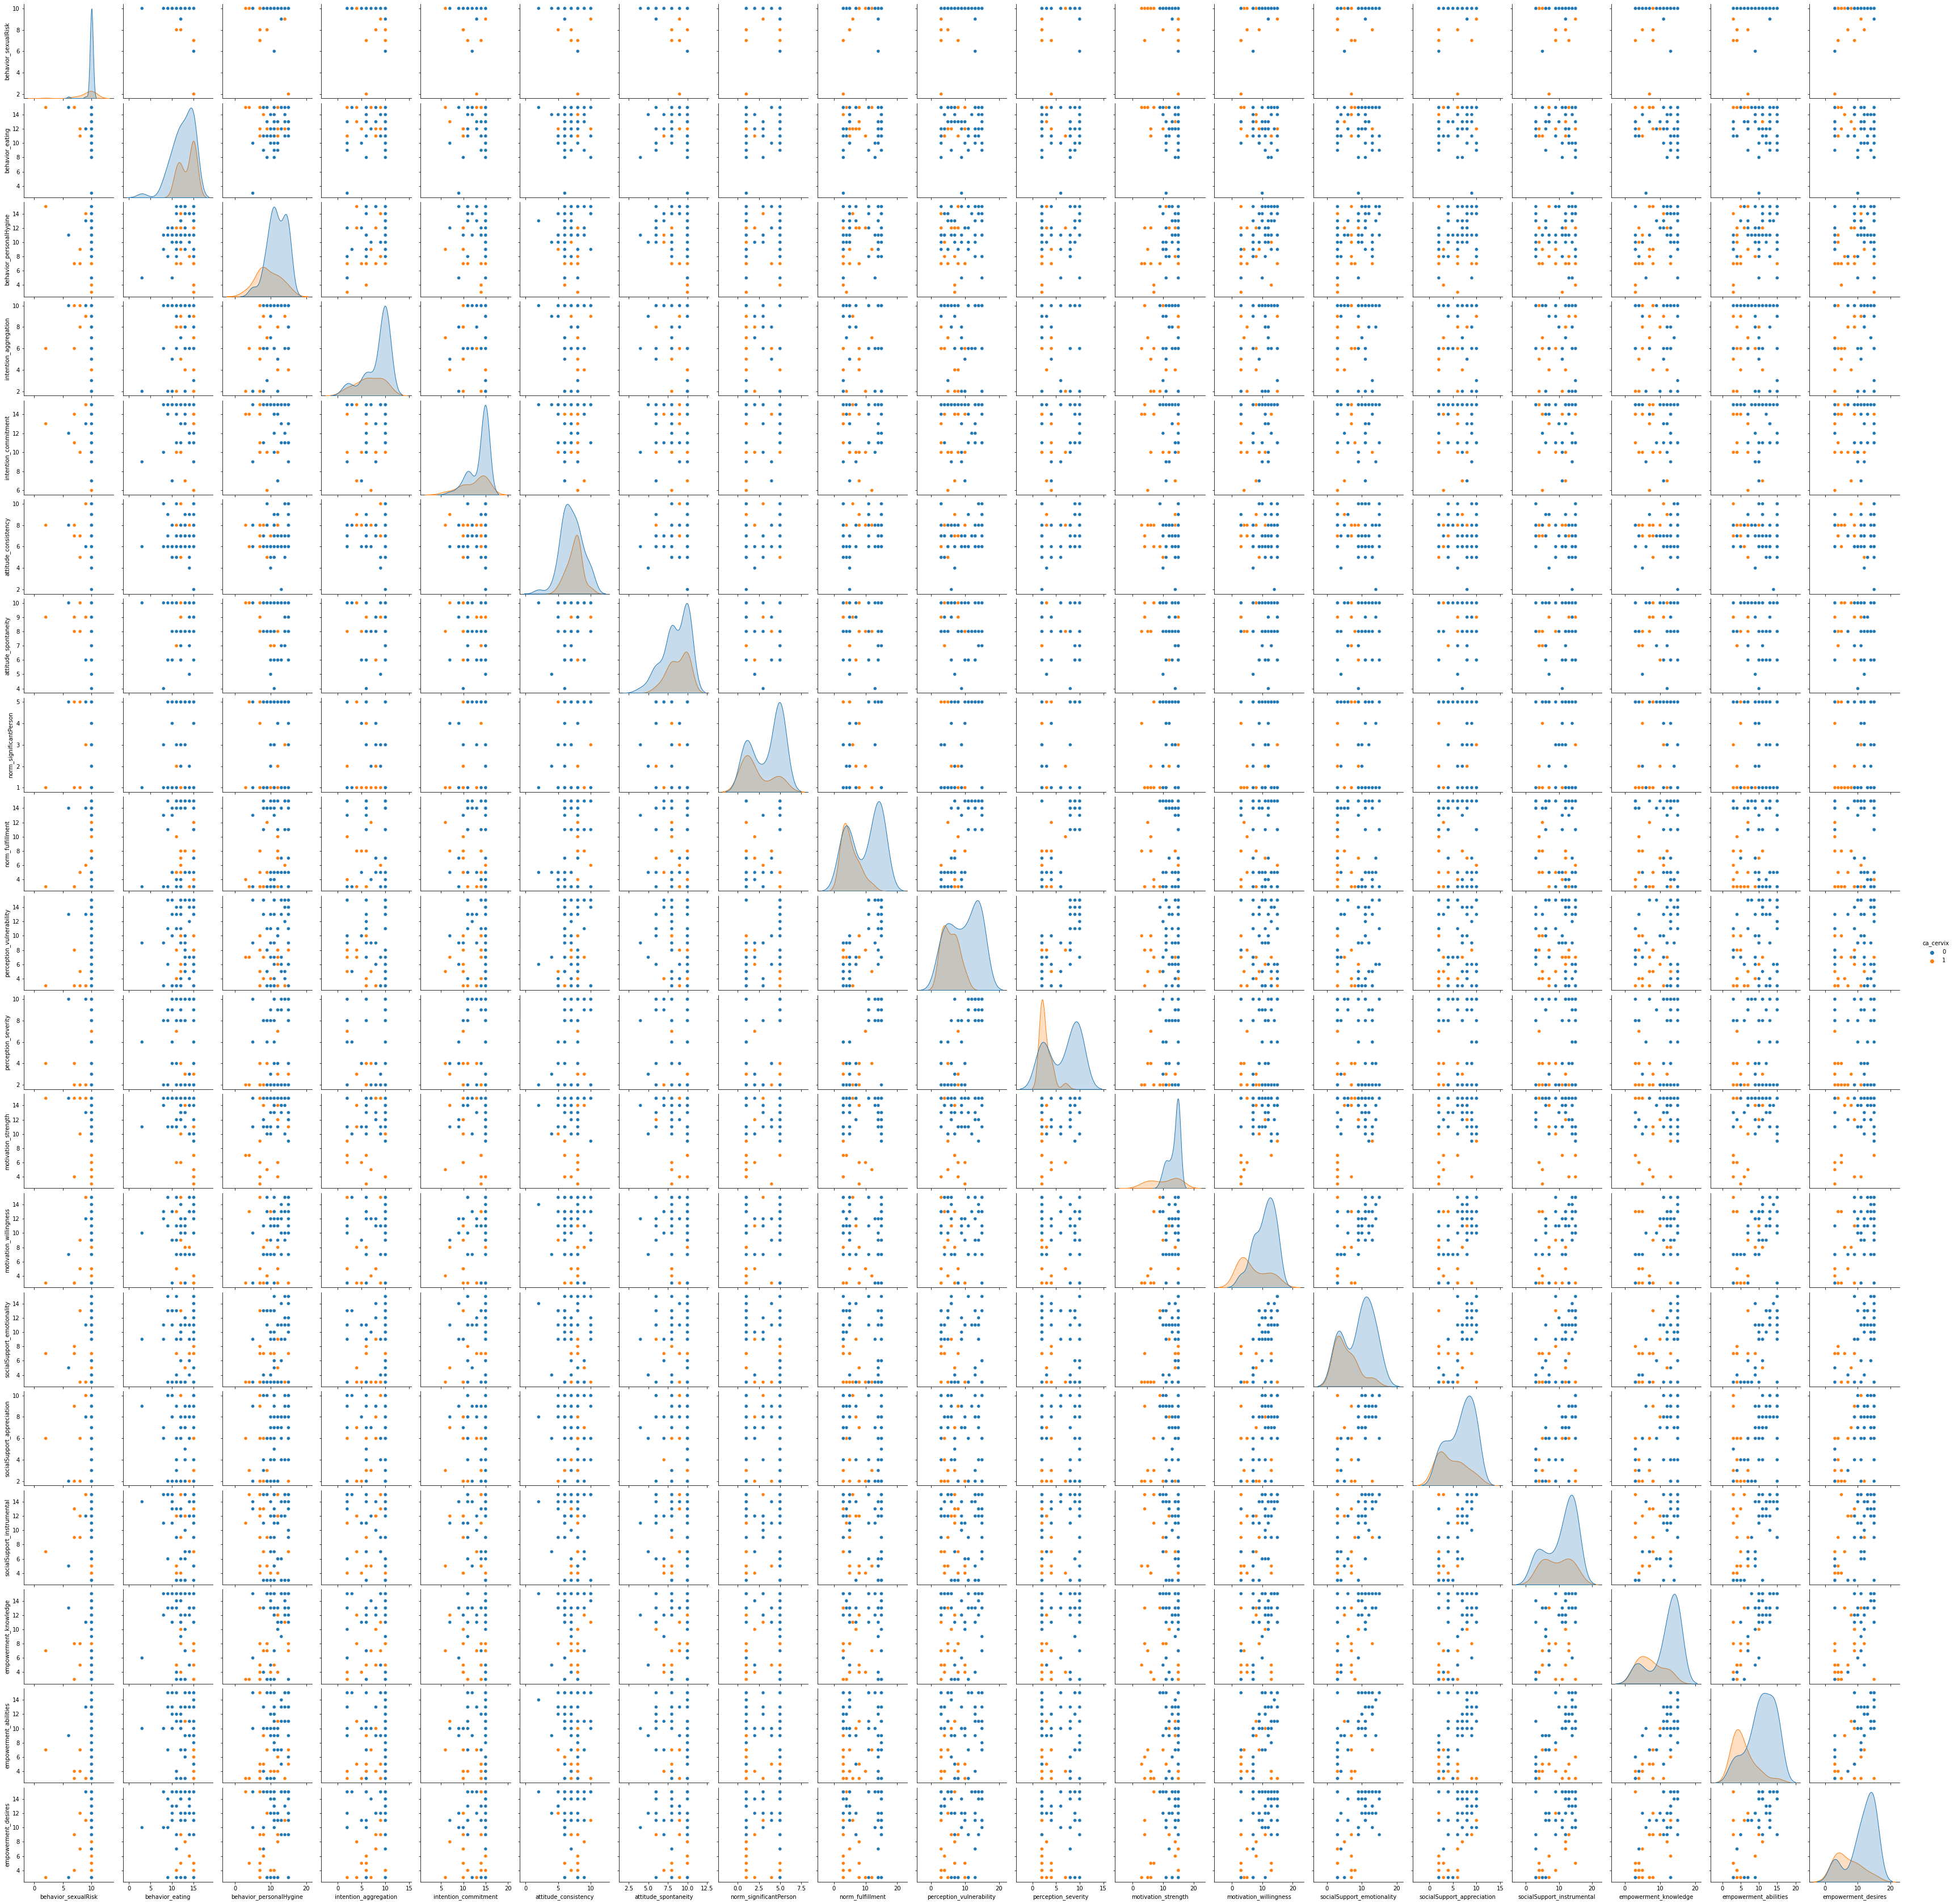

In [11]:
# As we can see that it is unbalanced and because it is a medical data, it is very hard to obtain new data. 
# We can plot the relationships in the dataset
sns.pairplot(df, hue='ca_cervix')

3.125

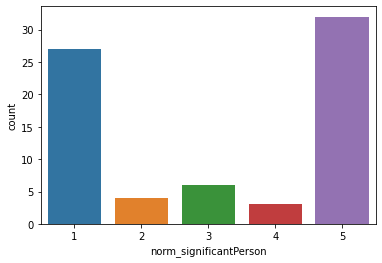

In [29]:

sns.countplot(data=df, x="norm_significantPerson")
df['norm_significantPerson'].mean()

Text(0, 0.5, 'norm_significantPerson')

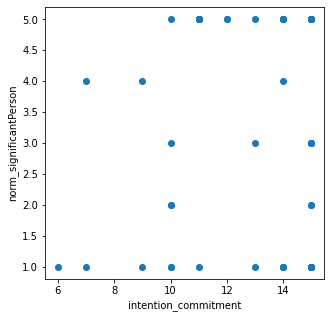

In [22]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('intention_commitment')
ax.set_ylabel('norm_significantPerson')


Text(0, 0.5, 'behavior_eating')

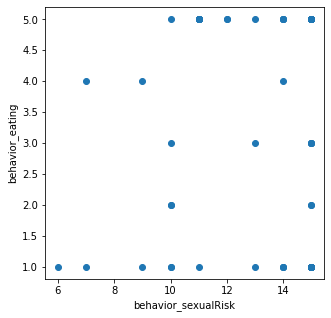

In [23]:
# we can see correlations between features 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('behavior_sexualRisk')
ax.set_ylabel('behavior_eating')


Text(0, 0.5, 'behavior_personalHygine')

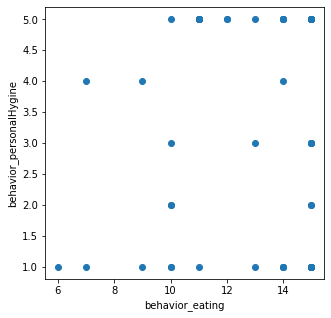

In [24]:
# we can see correlations between features 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('behavior_eating')
ax.set_ylabel('behavior_personalHygine')


Text(0, 0.5, 'attitude_consistency')

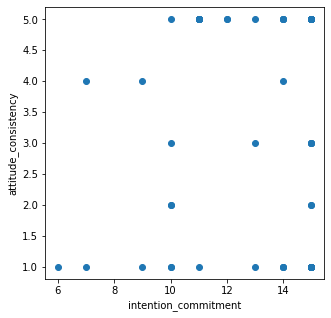

In [25]:
# we can see correlations between features 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('intention_commitment')
ax.set_ylabel('attitude_consistency')


Text(0, 0.5, 'attitude_consistency')

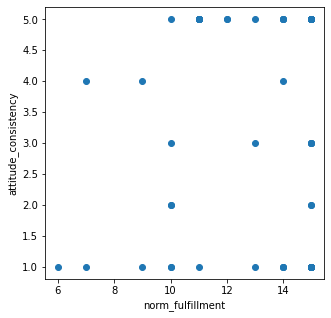

In [26]:
# we can see correlations between features 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('norm_fulfillment')
ax.set_ylabel('attitude_consistency')


Text(0, 0.5, 'motivation_villingness')

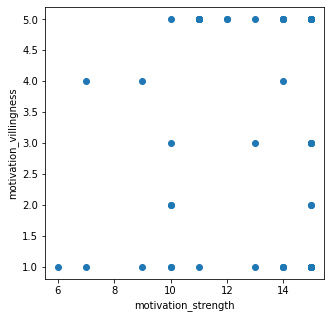

In [27]:
# we can see correlations between features 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('motivation_strength')
ax.set_ylabel('motivation_villingness')


Text(0, 0.5, 'empowermemt-knowledge')

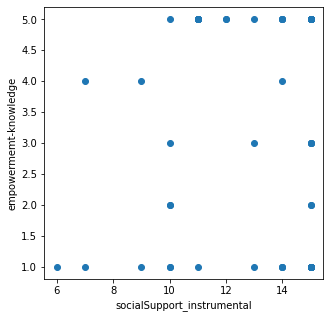

In [28]:
# we can see correlations between features 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.intention_commitment, df.norm_significantPerson)
ax.set_xlabel('socialSupport_instrumental')
ax.set_ylabel('empowermemt-knowledge')


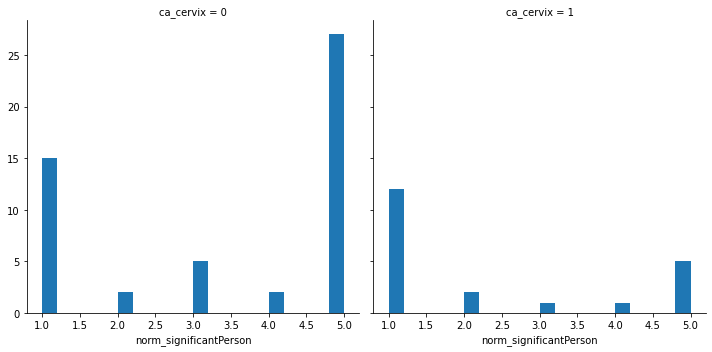

In [30]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'norm_significantPerson', bins=20)

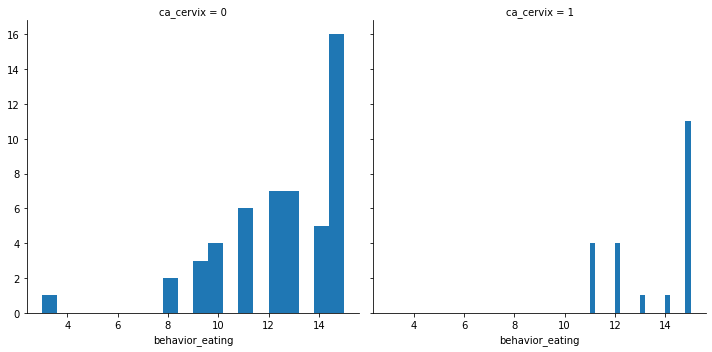

In [31]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'behavior_eating', bins=20)

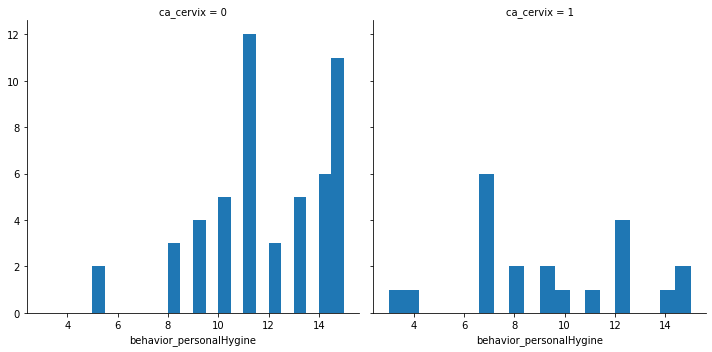

In [32]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'behavior_personalHygine', bins=20)

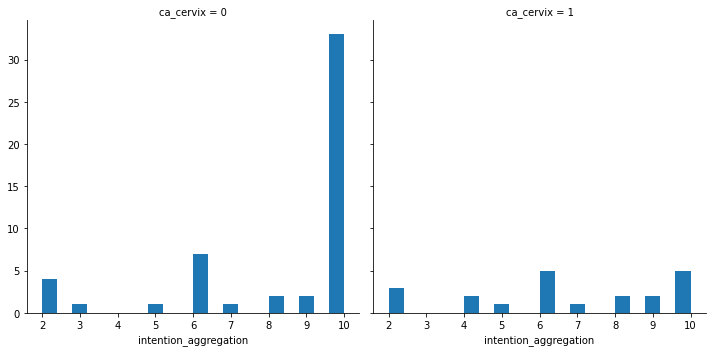

In [33]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'intention_aggregation', bins=20)

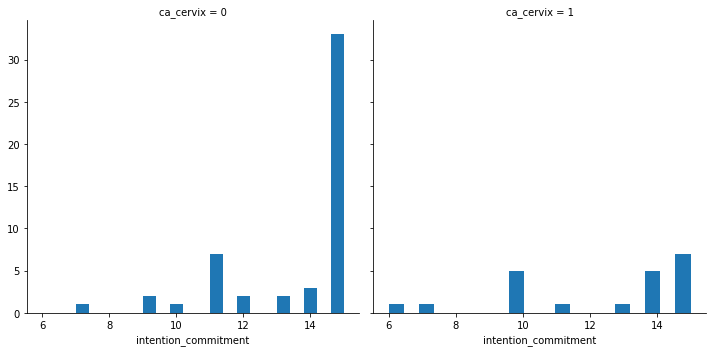

In [34]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'intention_commitment', bins=20)

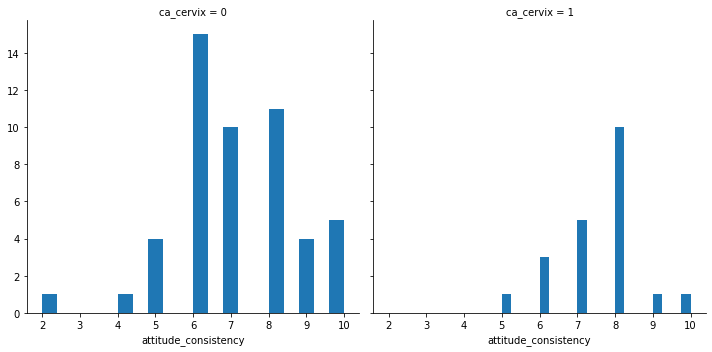

In [35]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'attitude_consistency', bins=20)

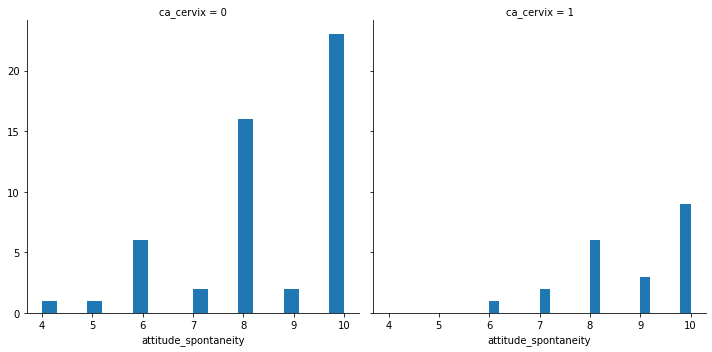

In [36]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'attitude_spontaneity', bins=20)

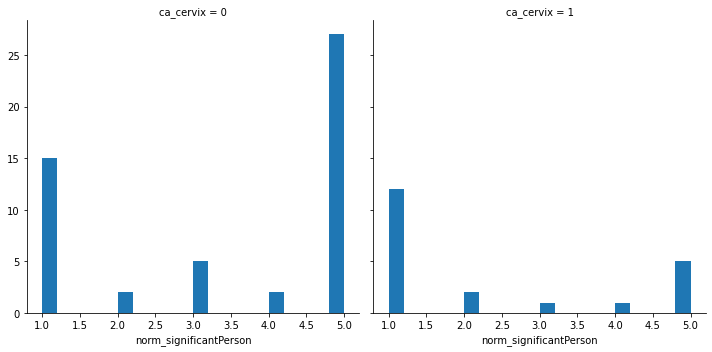

In [37]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'norm_significantPerson', bins=20)

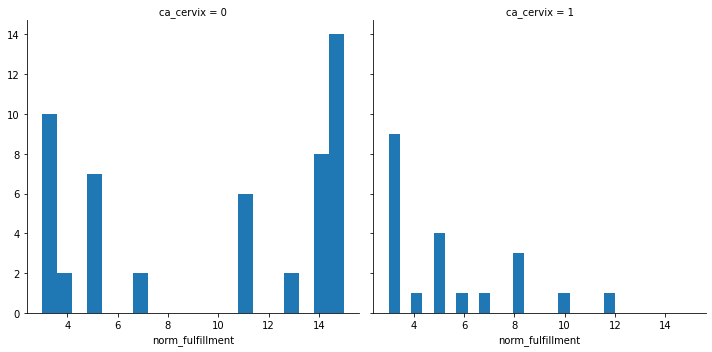

In [38]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'norm_fulfillment', bins=20)

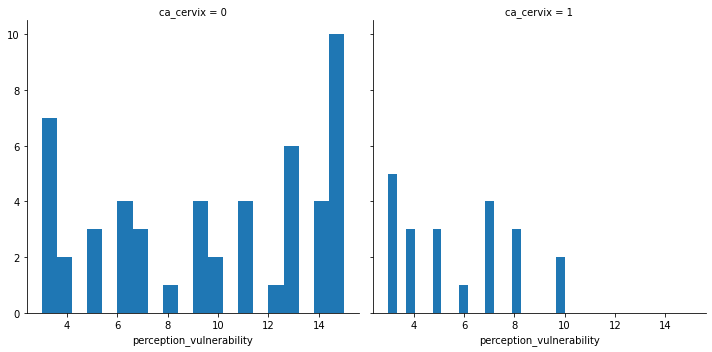

In [39]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'perception_vulnerability', bins=20)

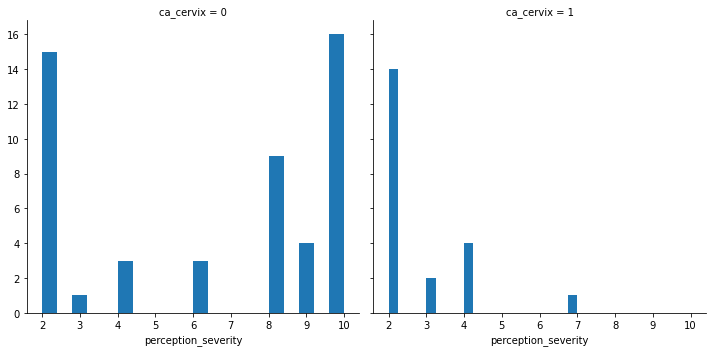

In [40]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'perception_severity', bins=20)

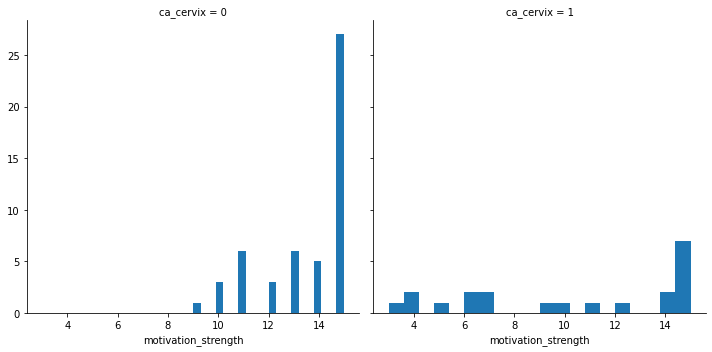

In [41]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'motivation_strength', bins=20)

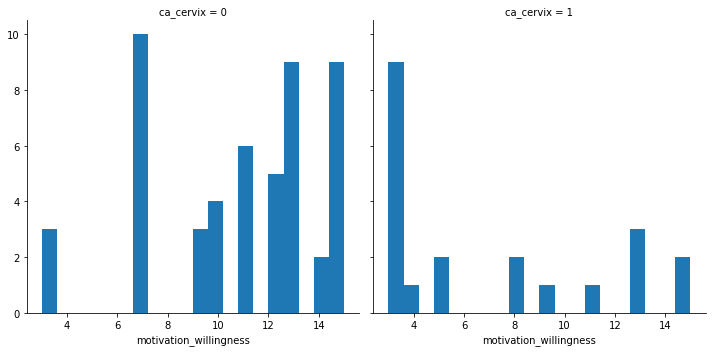

In [42]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'motivation_willingness', bins=20)

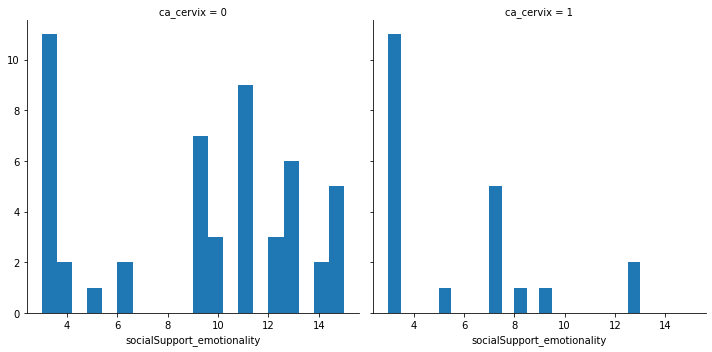

In [43]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'socialSupport_emotionality', bins=20)

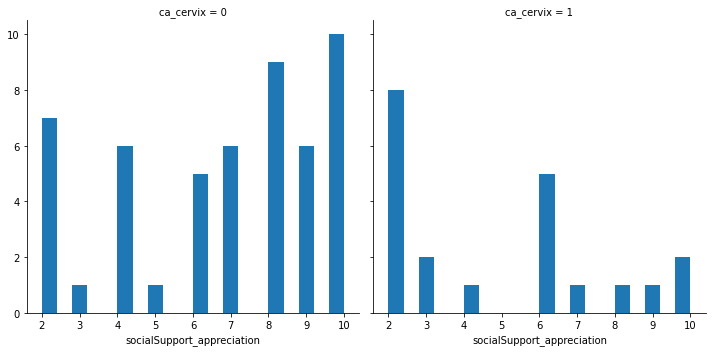

In [44]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'socialSupport_appreciation', bins=20)

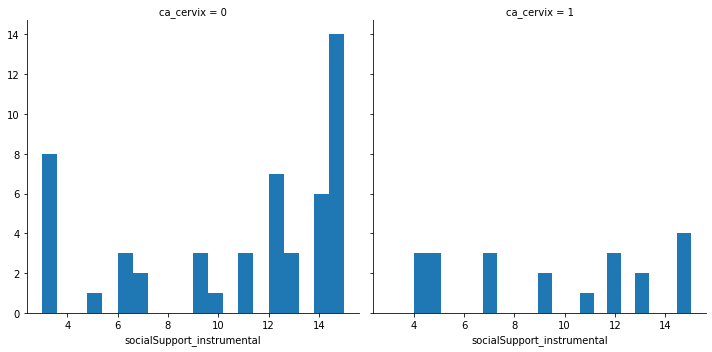

In [45]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'socialSupport_instrumental', bins=20)

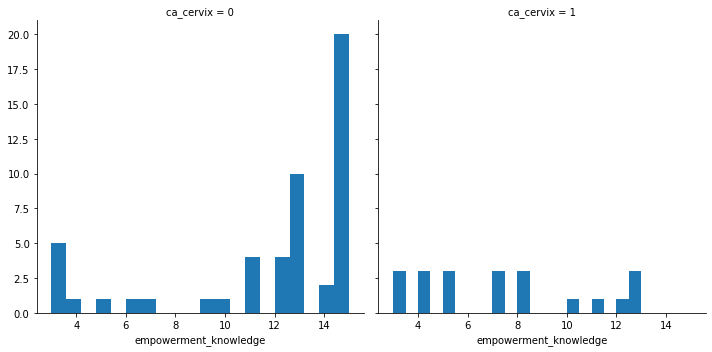

In [46]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'empowerment_knowledge', bins=20)

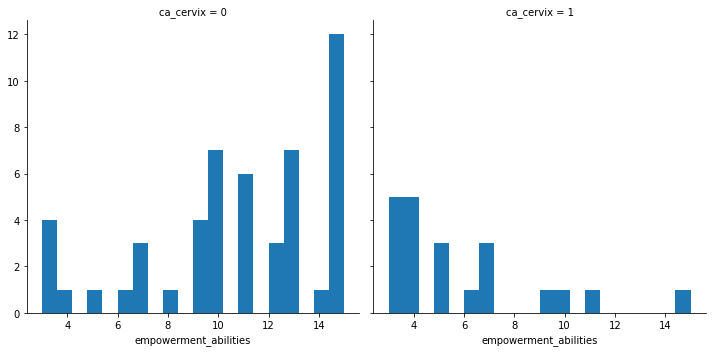

In [47]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'empowerment_abilities', bins=20)

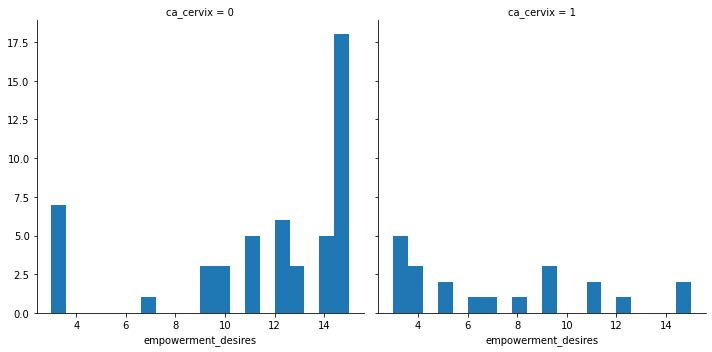

In [48]:
g = sns.FacetGrid(df, col='ca_cervix', height=5)
g.map(plt.hist, 'empowerment_desires', bins=20)

In [11]:
# Next we get probability of getting cervical cancer for each grup
for colmn in df.columns:
  if colmn != "ca_cervix":
    print(df[[colmn, 'ca_cervix']].groupby([colmn], as_index=False).mean().sort_values(by='ca_cervix', ascending=False))

   behavior_sexualRisk  ca_cervix
0                    2   1.000000
2                    7   1.000000
3                    8   1.000000
4                    9   0.500000
5                   10   0.234375
1                    6   0.000000
   behavior_eating  ca_cervix
8               15   0.407407
4               11   0.400000
5               12   0.363636
7               14   0.166667
6               13   0.125000
0                3   0.000000
1                8   0.000000
2                9   0.000000
3               10   0.000000
    behavior_personalHygine  ca_cervix
0                         3   1.000000
1                         4   1.000000
3                         7   1.000000
8                        12   0.571429
4                         8   0.400000
5                         9   0.333333
6                        10   0.166667
11                       15   0.153846
10                       14   0.142857
7                        11   0.076923
2                         5   0.0

Data partitioning 


In [9]:
# For training data we will drop the last column which is the classification result
X = df.drop(['ca_cervix'], axis=1)
# We will assign the ca_cervix to y as our results
Y = df.ca_cervix

# Lastly we divide the dataset into train and test we divide them by 80% trainig and 20% testing. 
# In addition we can use stratify to split the dataset with the same proportions of examples in each class.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [6]:
# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

Logistic Regression with batch gradient descent


In [372]:
# After analyzing the data, we can start implementing the logistic regression and train our data with it.
# First we start with defining a sigmoid function 
def sigmoid_function(yhat,a):
  yhat=(1/(1+np.exp(-a)))
  return yhat

#Then we define X as the training data and Y for the predicted class 
m,n=X_train.shape
learning_rate=0.005 #defining the learning rate
# Then we can initialize the weight
w=np.random.randn(n)
b=0
yhat=0
Y=Y_train
costf=np.zeros(1000)
#Then we can set a for loop for iterations
for iter in range(1000):
   a= X_train.dot(w.T) + b
   A= sigmoid_function(yhat,a)
   cost=-1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))  #cost function
   costf[iter]=cost   
   dw = (1/n)*np.dot(X_train.T,  ( A - Y.T)  ) #
                                               # the derivative of the cost function 
   db= np.sum(A-Y)/n                           #

   w= w-(learning_rate*dw)
   b=b-(learning_rate*db)

# Finally prediction of the classes based of training
prediction_prob=  np.dot(X_test,w)
prediction_prob= sigmoid_function(yhat,prediction_prob)
prediction = np.where( prediction_prob > 0.5, 1, 0 )        
# We can get the accuracy of the model
print(accuracy_score(Y_test, prediction))

0.8


In [131]:
# We can see that our accuracy is 80%. 

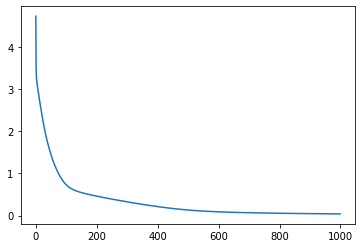

In [373]:
plt.plot(costf)
# We can see our cost function using batch gradient descent 

Implementing the mini-batch gradient descent 

In [358]:
# After analyzing the data, we can start implementing the logistic regression and train our data with it.
# First we start with defining a sigmoid function 
def sigmoid_function(yhat,a):
  yhat=(1/(1+np.exp(-a)))
  return yhat

#Then we define X as the training data and Y for the predicted class 
m,n=X_train.shape
learning_rate=0.001 #defining the learning rate
# Then we can initialize the weight
w=np.random.randn(n,1)
b=0
yhat=0
Y=Y_train
batch_size=4

# we create the mini batches
mini_batches=[]
data=np.column_stack((X_train,Y)) # we want to concantane the Y column to the data to create the batches
number_of_batches=X_train.shape[0]//batch_size # Then we can calculate batch number and round it
# creation of the mini batches
for i in range(number_of_batches+1):
  mini_batch=data[i*batch_size:(i+1)*batch_size,:]
  mini_batches.append((mini_batch[:,:-1],mini_batch[:,-1].reshape((-1,1))))

#Then we can set a for loop for iterations
i=0
for iter in range(1000):
  
   for batch in mini_batches:
     
     cost= np.dot(((np.dot(batch[0],w))-batch[1]).T,(np.dot(batch[0],w))-batch[1])
     
     i=i+1
     dw = np.sum((np.dot(batch[0],w)+b)-batch[1])
     w=w-(learning_rate*(dw/n))       
   

# Finally prediction of the classes based of training
prediction_prob=  np.dot(X_test,w)
prediction_prob= sigmoid_function(yhat,prediction_prob)
prediction = np.where( prediction_prob > 0.5, 1, 0 )        
# We can get the accuracy of the model
print(accuracy_score(Y_test, prediction))

0.6


In [304]:
# to compare the model with commercially available logistic regression model we can use sklearn library easily for further reference see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
y_pred_ = clf.predict(X_test)
# We can get the accuracy of the model
print(accuracy_score(Y_test, prediction))

0.6666666666666666


In [ ]:
# We can see that logistic regression with batch gradient descent got better result than the mini-batch gradient descent. And I tried the sklearn's logistic regression function to fit the data which got 66% accuracy which is similar to the mini-batch gradient descent algorithm. The sample size of the data is unfortunately small and with larger data we might get better results. Also, we could use SGD which might get better accuracy than mini-batch. Another solution is using optimizers. Results for two of them can be seen below.

In [350]:
# We can use keras to implement the Adam optimizer easily for furter reference see: https://keras.io/api/optimizers/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(1,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 2.2460
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 2.1822
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 2.1046
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 2.0404
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 1.9694
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 1.9068
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 1.8441
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 1.7731
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 1.7164
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6531
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 1.6021
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5420
Epoch 13/100
2/2 [==============================] - 0s 22ms/s

In [351]:
prediction_prob=model.predict(X_test)
prediction = np.where( prediction_prob > 0.5, 1, 0 )       
print(accuracy_score(Y_test, prediction))

0.8666666666666667


In [352]:
# We can also use keras to implement the RMSprop optimizer easily for furter reference see: https://keras.io/api/optimizers/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(1,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='RMSprop', loss='binary_crossentropy')
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0687
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0298
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0190
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9977
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9915
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9724
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9629
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9589
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9459
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9384
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9284
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9215
Epoch 13/100
2/2 [==============================] - 0s 3ms/st

In [354]:
prediction_prob=model.predict(X_test)
prediction = np.where( prediction_prob > 0.5, 1, 0 )       
print(accuracy_score(Y_test, prediction))

0.6


In [ ]:
# We can see that Adam optimizer got better result than RmsProp and RMSProp is improved Adam which includes bias and momentum correction [2].
# We can see that adam optimizer got the best result of all training methods. We know that Adam optimizer is widely usec and it's computation time is faster, and it does not require too many parameters for tuning.
# Because of better results and faster computation time I think we should use the optimizer in our models. 
# Finally, the results are consistent with the literature [2]

[1] https://doi.org/10.1166/asl.2016.7980

[2] https://doi.org/10.48550/arXiv.1412.6980
